In [1]:
import pandas as pd

# Read the dataset
df = pd.read_csv('government_employees.csv')

# Print the head of the dataset
print(df.head())

  Date Employed  Years of Service     Income  Investment Returns  \
0    1992-10-05                32  111221.63            10709.59   
1    2015-10-13                 9  101807.60            -1875.42   
2    1998-11-21                25   35450.05            10023.49   
3    1997-04-19                27  134847.31            -4339.10   
4    1997-10-24                27   74469.66            15248.96   

   Interest Rates Department    Position  Age  Gender  
0            3.89    Defense     Manager   59    Male  
1            3.36  Education     Manager   38  Female  
2            1.35  Education     Analyst   39  Female  
3            1.92     Health  Technician   53    Male  
4            1.90     Health     Analyst   52  Female  


C:\Users\pac computers\AppData\Local\Temp\ipykernel_11752\1991220297.py:16: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_income = df['Income'].resample('A').mean()


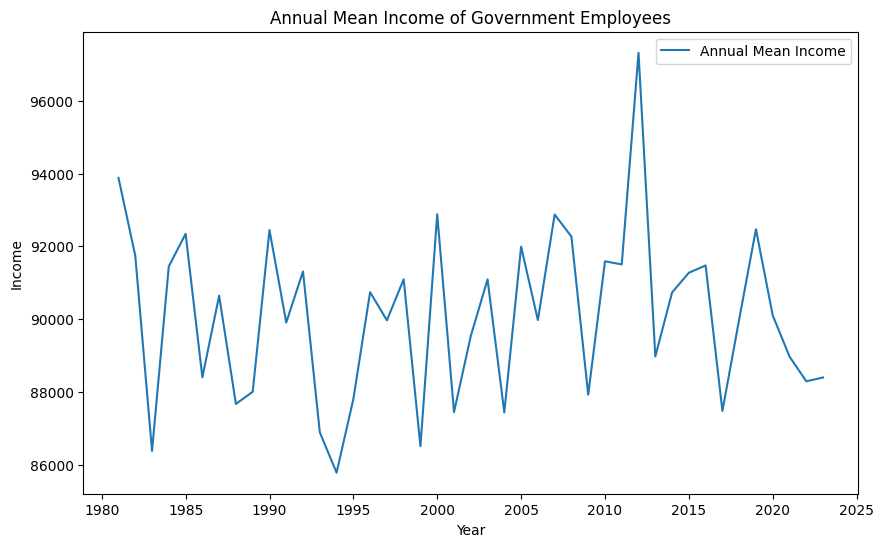

                               SARIMAX Results                                
Dep. Variable:                 Income   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -401.982
Date:                Thu, 17 Oct 2024   AIC                            809.965
Time:                        13:08:10   BIC                            815.178
Sample:                    12-31-1980   HQIC                           811.876
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2911      0.233      1.247      0.212      -0.166       0.749
ma.L1         -0.3619      0.228     -1.588      0.112      -0.809       0.085
sigma2      6.352e+06   1.71e-08   3.71e+14      0.0

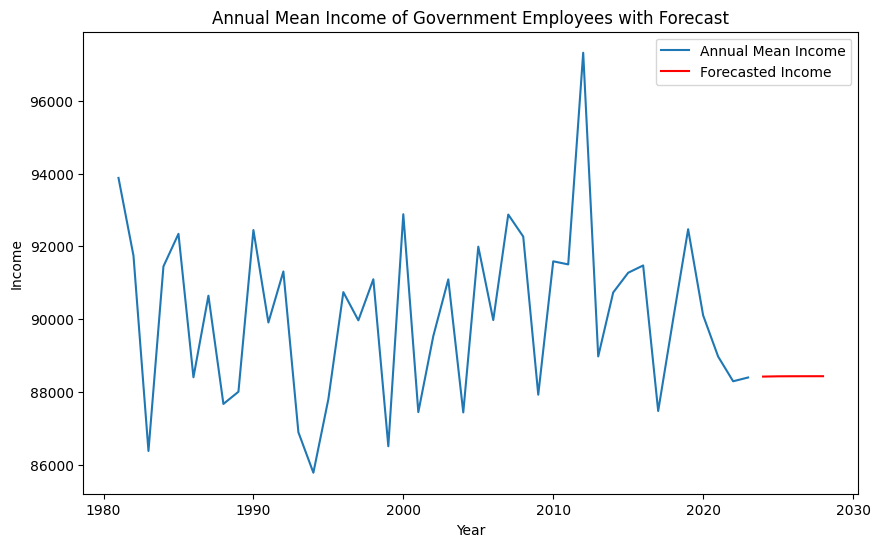

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Load the dataset
df = pd.read_csv('government_employees.csv')

# Convert 'Date Employed' to datetime format
df['Date Employed'] = pd.to_datetime(df['Date Employed'])

# Set 'Date Employed' as the index
df.set_index('Date Employed', inplace=True)

# Resample the data to get annual mean income
annual_income = df['Income'].resample('A').mean()

# Plot the annual income
plt.figure(figsize=(10, 6))
plt.plot(annual_income, label='Annual Mean Income')
plt.title('Annual Mean Income of Government Employees')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.show()

# Fit an ARIMA model
warnings.filterwarnings("ignore")
model = ARIMA(annual_income, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Plot the forecasted values
forecast = model_fit.forecast(steps=5)
plt.figure(figsize=(10, 6))
plt.plot(annual_income, label='Annual Mean Income')
plt.plot(forecast, label='Forecasted Income', color='red')
plt.title('Annual Mean Income of Government Employees with Forecast')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('government_employees.csv')

# Create a new column 'Withdrawal' based on a condition (e.g., Income < 50000)
df['Withdrawal'] = df['Income'] < 50000

# Select features and target variable
X = df[['Age']]
y = df['Withdrawal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1680
        True       0.00      0.00      0.00       320

    accuracy                           0.84      2000
   macro avg       0.42      0.50      0.46      2000
weighted avg       0.71      0.84      0.77      2000



13:16:48 - cmdstanpy - INFO - Chain [1] start processing
13:16:52 - cmdstanpy - INFO - Chain [1] done processing


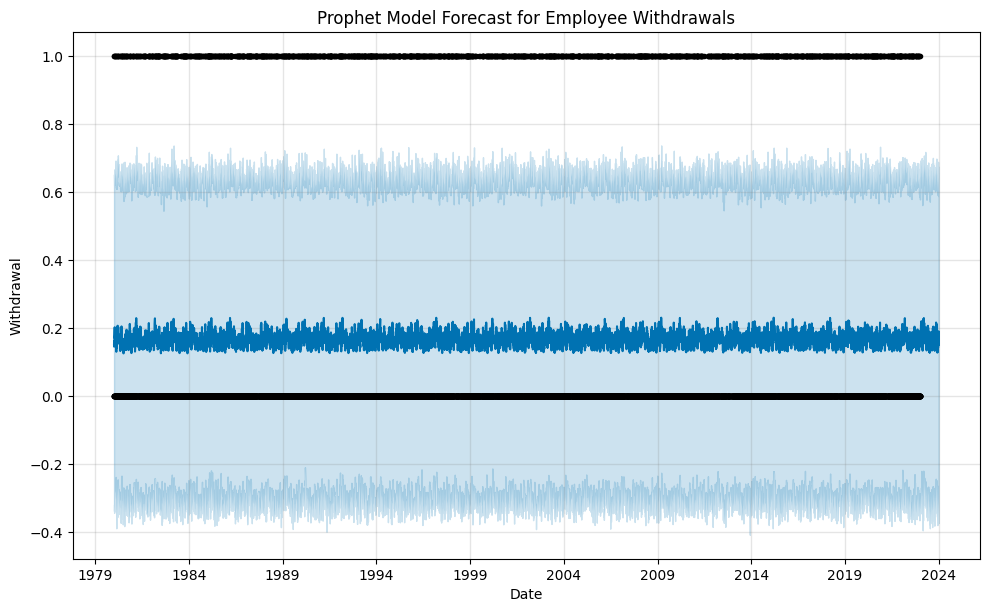

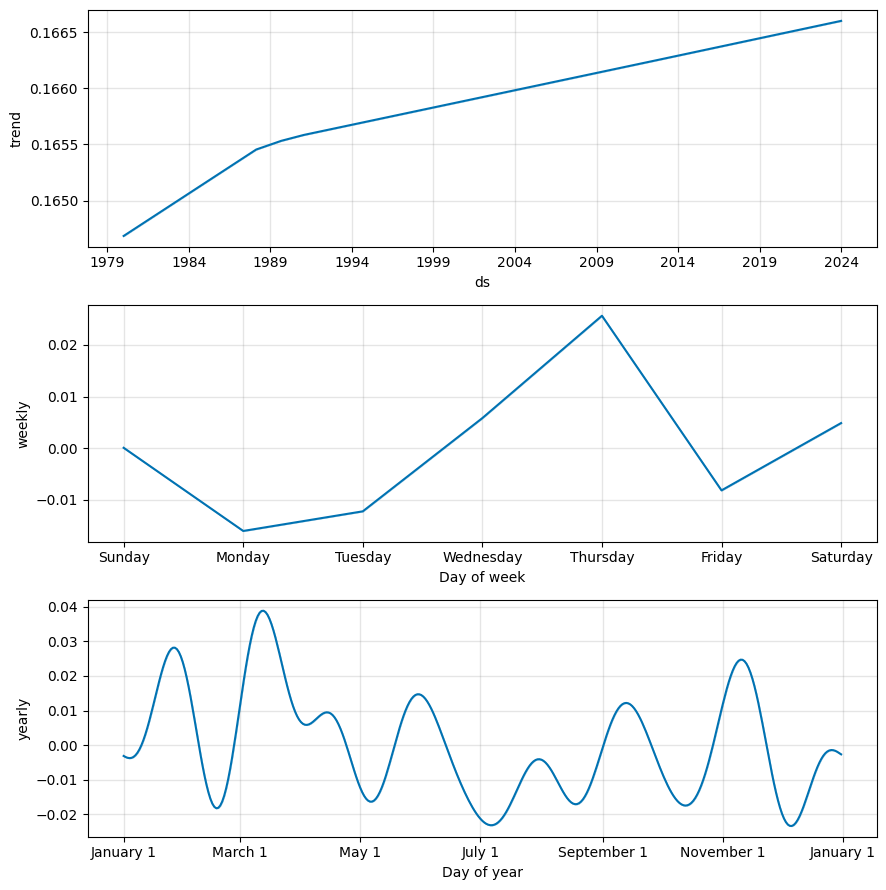

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('government_employees.csv')

# Create a new column 'Withdrawal' based on a condition (e.g., Income < 50000)
df['Withdrawal'] = df['Income'] < 50000

# Prepare the data for Prophet model
prophet_df = df[['Date Employed', 'Withdrawal']]
prophet_df.columns = ['ds', 'y']

# Initialize and train the Prophet model
model = Prophet()
model.fit(prophet_df)

# Make future dataframe for predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Model Forecast for Employee Withdrawals')
plt.xlabel('Date')
plt.ylabel('Withdrawal')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


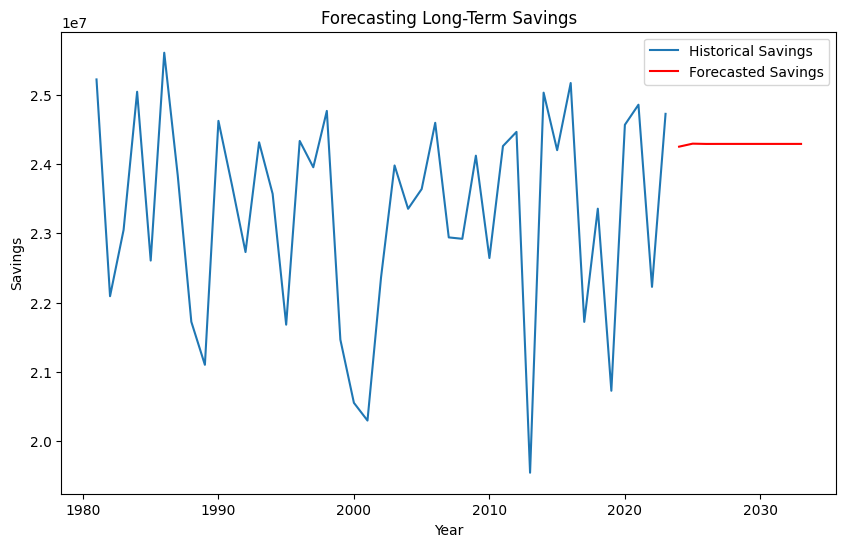

Forecasted Savings for the next 10 years:
2023-12-31    2.425051e+07
2024-12-31    2.429393e+07
2025-12-31    2.428995e+07
2026-12-31    2.429032e+07
2027-12-31    2.429028e+07
2028-12-31    2.429029e+07
2029-12-31    2.429029e+07
2030-12-31    2.429029e+07
2031-12-31    2.429029e+07
2032-12-31    2.429029e+07
Freq: YE-DEC, Name: predicted_mean, dtype: float64


In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('government_employees.csv')

# Prepare the data
df['Date Employed'] = pd.to_datetime(df['Date Employed'])
df.set_index('Date Employed', inplace=True)

# Calculate cumulative savings considering contributions, interest rates, and investment returns
df['Cumulative Savings'] = df['Income'] + df['Investment Returns'] + (df['Income'] * df['Interest Rates'] / 100)

# Resample the data to get annual cumulative savings
annual_savings = df['Cumulative Savings'].resample('A').sum()

# Fit the ARIMA model
model = ARIMA(annual_savings, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future savings
forecast = model_fit.forecast(steps=10)  # Forecasting for the next 10 years

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(annual_savings, label='Historical Savings')
plt.plot(forecast, label='Forecasted Savings', color='red')
plt.title('Forecasting Long-Term Savings')
plt.xlabel('Year')
plt.ylabel('Savings')
plt.legend()
plt.show()

# Print the forecasted values
print("Forecasted Savings for the next 10 years:")
print(forecast)
